[[5.06479467]
 [1.95125859]] 0.17243987100662858


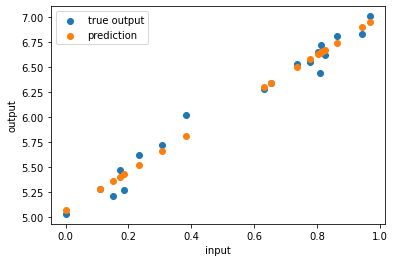

In [2]:
#dataset1 = 랜덤으로 생성한 데이터, 입력 = 1차원, 출력 = 1차원

import numpy as np
import matplotlib.pyplot as plt

N = 20 # 샘플의 개수
x = np.random.rand(N,1)  # [0,1] 사이의 실수를 랜덤으로 N개 생성
y = 5 + 2 * x + 1e-1 * np.random.randn(N,1) #N(0,1)을 그대로 넣지 말고 1/10으로 줄여서 넣기 위해서 1e-1을 곱해준다
  
# design matrix, bias 없음
# X = x

# design matrix, bias 포함
X = np.hstack([np.ones((N,1)), x])  # 모든 행렬에 첫번째 열 1이 추가된다라는 느낌

# normal equation
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
# X.T.dot(X) = X^T * X , dot을 넣어주는 이유가 행렬 곱을 유도하기 위해서
# np.linalg.inv(X.T.dot(X)) = (X^T * X)^(-1)
# np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) = (X^T * X)^(-1) * X^T * y

y_pred = X.dot(theta)
SSE = np.sum((y-y_pred)**2)  # 주황색과 파란색 점 사이의 거리를 제곱해서 더한다.

print(theta, SSE) 

plt.figure()
plt.scatter(x,y)
plt.xlabel('input')
plt.ylabel('output')
plt.scatter(x,y_pred)

plt.legend(['true output', 'prediction'])

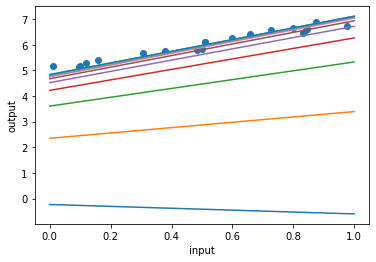

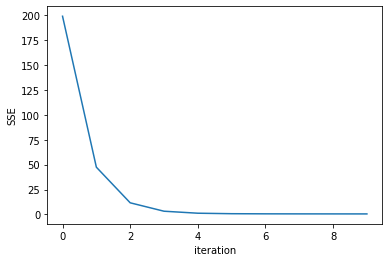

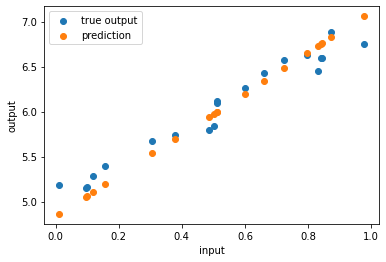

In [8]:
# batch gradient descent, bias 포함

eta = 0.01 # learning rate
maxlter = 10
theta = np.random.randn(2,1)

SSE = []

#plot을 위한 값들
x_new = np.linspace(0,1,10)
x_new = x_new.reshape(10,1)
X_new = np.hstack([np.ones((10,1)), x_new])
y_new = X_new.dot(theta)

plt.figure()
plt.scatter(x,y)
plt.xlabel('input')
plt.ylabel('output')
plt.plot(x_new,y_new)

for iter in range(maxlter):
    grad = X.T.dot(X.dot(theta) - y)  # X^T * (X * theta - y)
    theta = theta - 2 * eta * grad # theta를 업데이트한다라고 생각
    
    y_pred = X.dot(theta)
    SSE.append(np.sum((y-y_pred) ** 2))
    
    # 그림 그리기, BGD 동작이랑 아뭄 상관이 없음
    y_new = X_new.dot(theta)
    plt.plot(x_new, y_new)
#    print('[iter %3d] SSE: % 8.3f' % (iter,SSE[-1]))

plt.figure()
plt.plot(SSE)
plt.xlabel('iteration')
plt.ylabel('SSE')

plt.figure()
plt.scatter(x,y)
plt.xlabel('input')
plt.ylabel('output')

plt.scatter(x,y_pred)
plt.legend(['true output', 'prediction'])

[iter   0] random sample: 15, SSE:  162.298
[iter   1] random sample: 15, SSE:   85.921
[iter   2] random sample: 16, SSE:   49.604
[iter   3] random sample:  5, SSE:   29.514
[iter   4] random sample: 17, SSE:   18.799
[iter   5] random sample:  1, SSE:   12.451
[iter   6] random sample: 18, SSE:    7.760
[iter   7] random sample: 15, SSE:    6.768
[iter   8] random sample:  8, SSE:    3.841
[iter   9] random sample: 11, SSE:    2.568


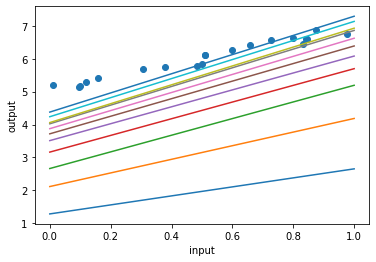

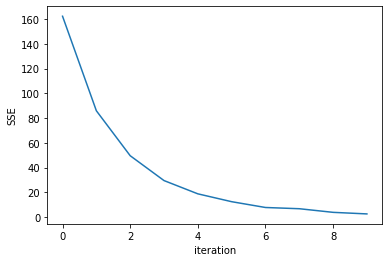

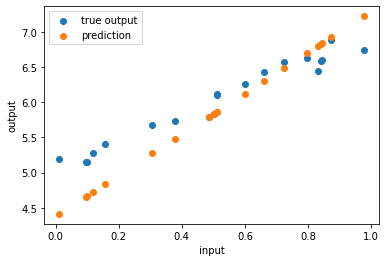

In [21]:
# stochastic gradient descent, bias 포함

eta = 0.1 # learning rate
maxlter = 10
theta = np.random.randn(2,1)
y_pred = X.dot(theta)

SSE = []

#plot을 위한 값들
x_new = np.linspace(0,1,10)
x_new = x_new.reshape(10,1)
X_new = np.hstack([np.ones((10,1)), x_new])
y_new = X_new.dot(theta)

plt.figure()
plt.scatter(x,y)
plt.xlabel('input')
plt.ylabel('output')
plt.plot(x_new,y_new)

for iter in range(maxlter):
    idn = np.random.randint(0, N, 1)  # stockchastic이니까 랜덤으로 정수를 딱 하나 뽑는다, (최솟값, 최댓값, shape)
    grad = -(y[idn, 0] - y_pred[idn, 0]) * X[idn,:].reshape(2,1) # X[idn,:] row vector를 column 벡터로 바꾼다
    theta = theta - 2 * eta * grad
    
    y_pred = X.dot(theta)
    SSE.append(np.sum((y-y_pred) ** 2))
    
    # 그림 그리기, BGD 동작이랑 아뭄 상관이 없음
    y_new = X_new.dot(theta)
    plt.plot(x_new, y_new)
    print('[iter %3d] random sample: %2d, SSE: %8.3f' % (iter, idn ,SSE[-1]))

plt.figure()
plt.plot(SSE)
plt.xlabel('iteration')
plt.ylabel('SSE')

plt.figure()
plt.scatter(x,y)
plt.xlabel('input')
plt.ylabel('output')

plt.scatter(x,y_pred)
plt.legend(['true output', 'prediction'])

# batch => (+) 부드럽게 해에 접근을 함, 전체 샘플에 대한 sum 
#          (-) local minimum에 빠지면 나오기 어려움
# stochastic => (+) 변동성이 있다보니 local에 빠져도 나올 여지가 높음
#               (-) 어떤 샘플이 뽑히는지에 따라서, grad의 방향이 변동이 큼, 불규칙하게 다가감             

38 5
38 5


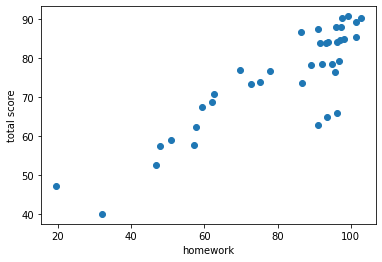

In [5]:
#dataset2 = 지난 학기 성적(익명, 노이즈), 입력 = 5차원, 출력 = 1차원

# 총점 = 출석 10% / 사전강의&퀴즈 15% / 과제 20% / 중간고사 25% / 기말고사 30%
# y = 0.10 * data[:,1] + 0.15 * data[:,2] + 0.20 * data[:,3] + 0.25 * data[:,4] + 0.30 * data[:,5]

data = np.loadtxt("data.csv", delimiter = ",")

# design matrix, bias 없음
X = data[:, 1:] # 입력 = 두번째열 ~ 끝열
y = data[:,0] # 출력 = 첫번째열, 벡터
y = y.reshape(-1,1) # N x 1 행렬로 바꾸기


N,M = X.shape
print(N,M)  # 38명의 학생과 5개의 입력(출석, 사전강의...)

plt.figure()
plt.scatter(X[:,2],y) 
plt.xlabel('homework')
plt.ylabel('total score')

#design matrix, bias 추가
# X = np.hstack([np.ones((N,1)), X])

N,M = X.shape
print(N,M)

27.252216972424193
[[0.07329246]
 [0.17379784]
 [0.18305024]
 [0.26649007]
 [0.3062968 ]]


Text(0, 0.5, 'prediction')

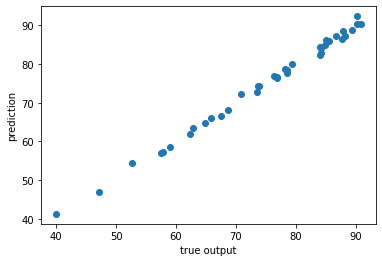

In [53]:
# normal equation
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_pred = X.dot(theta)
SSE = np.sum((y - y_pred) ** 2)
print(SSE)
print(theta)

plt.figure()
plt.scatter(y,y_pred)
plt.xlabel('true output')
plt.ylabel('prediction')

Text(0, 0.5, 'prediction')

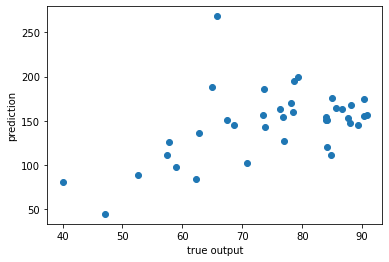

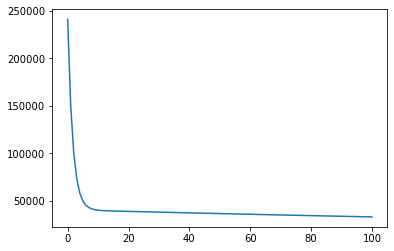

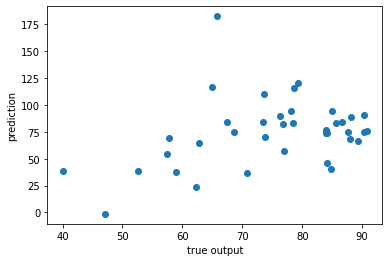

In [54]:
# batch gradient descent

theta = np.random.randn(M,1) # 초기 파라미터

eta = 0.0000001
maxlter = 100

y_pred = X.dot(theta)

SSE = []
SSE.append(np.sum((y-y_pred)**2))

plt.figure()
plt.scatter(y, y_pred)
plt.xlabel('true output')
plt.ylabel('prediction')

for iter in range(maxlter):
    grad = 2*X.T.dot(y_pred-y)
    theta = theta - eta*grad # gradient descent
    y_pred = X.dot(theta) # 주어진 input X에 대해서 전체 예측을 수행
    SSE.append(np.sum((y-y_pred)**2)) # SSE를 계산
    
plt.figure()
plt.plot(SSE)

plt.figure()
plt.scatter(y, y_pred)
plt.xlabel('true output')
plt.ylabel('prediction')

Text(0, 0.5, 'prediction')

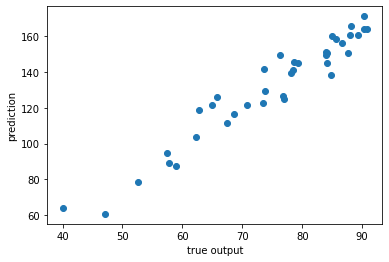

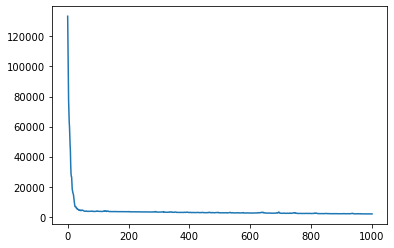

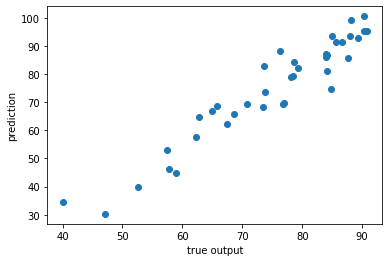

In [6]:
# stochastic gradient descent

theta = np.random.randn(M,1) # 초기 파라미터

eta = 0.000001
maxlter = 1000

y_pred = X.dot(theta)

SSE = []
SSE.append(np.sum((y-y_pred)**2))

plt.figure()
plt.scatter(y, y_pred)
plt.xlabel('true output')
plt.ylabel('prediction')

for iter in range(maxlter): 
    idn = np.random.randint(0,N,1)
    grad = - 2*(y[idn,:] - y_pred[idn,:]) * X[idn,:].reshape(M,1) # - 2(y^(t) - y_pred^(t)) * x^(t)
    theta = theta - eta*grad # gradient descent
    y_pred = X.dot(theta) # 주어진 input X에 대해서 전체 예측을 수행
    SSE.append(np.sum((y-y_pred)**2)) # SSE를 계산
    
plt.figure()
plt.plot(SSE)

plt.figure()
plt.scatter(y, y_pred)
plt.xlabel('true output')
plt.ylabel('prediction')